# 1. Limpeza e Preparação de Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('rent_house_price_data.csv')
df.head()

,Rent_price,Bedrooms,Square_meters,Garage,Bathrooms,City,Neighborhood
0,1.700,3,250.0,3,2.0,Uberlândia,Santa Rosa
1,1.600,3,150.0,0,2.0,Uberlândia,Mansour
2,2.000,2,120.0,1,3.0,Uberlândia,Jardim Inconfidência
3,4.200,4,240.0,2,4.0,Uberlândia,Segismundo Pereira
4,4.000,3,200.0,5,4.0,Uberlândia,Santa Mônica


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2545 entries, 0 to 2544
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rent_price     2537 non-null   object 
 1   Bedrooms       2545 non-null   int64  
 2   Square_meters  2522 non-null   float64
 3   Garage         2545 non-null   int64  
 4   Bathrooms      2543 non-null   float64
 5   City           2545 non-null   object 
 6   Neighborhood   2545 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 139.3+ KB


In [3]:
df.describe()

,Bedrooms,Square_meters,Garage,Bathrooms
count,2545.000000,2522.000000,2545.000000,2543.000000
mean,3.181139,261.556701,2.424361,2.804562
std,0.978442,824.189601,1.474054,1.431887
min,1.000000,3.000000,0.000000,1.000000
25%,3.000000,125.000000,1.000000,2.000000
50%,3.000000,210.000000,2.000000,3.000000
75%,4.000000,300.000000,4.000000,4.000000
max,5.000000,40000.000000,5.000000,5.000000


### 1.1 Tratando valores nulos

In [4]:
df.isnull().any()

Rent_price        True
Bedrooms         False
Square_meters     True
Garage           False
Bathrooms         True
City             False
Neighborhood     False
dtype: bool

In [5]:
df.isnull().sum()

Rent_price        8
Bedrooms          0
Square_meters    23
Garage            0
Bathrooms         2
City              0
Neighborhood      0
dtype: int64

In [6]:
df = df.dropna(axis=0)
df.shape

(2519, 7)

In [7]:
df.isnull().any()

Rent_price       False
Bedrooms         False
Square_meters    False
Garage           False
Bathrooms        False
City             False
Neighborhood     False
dtype: bool

In [8]:
df.reset_index(drop=True, inplace=True)

### 1.2 Correção de Tipos de Dados

In [9]:
df['Rent_price'] = df['Rent_price'].str.replace('.', '').str.strip()
df['Rent_price'] = df['Rent_price'].astype(float)
df['Bathrooms'] = df['Bathrooms'].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2519 entries, 0 to 2518
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rent_price     2519 non-null   float64
 1   Bedrooms       2519 non-null   int64  
 2   Square_meters  2519 non-null   float64
 3   Garage         2519 non-null   int64  
 4   Bathrooms      2519 non-null   int32  
 5   City           2519 non-null   object 
 6   Neighborhood   2519 non-null   object 
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 128.0+ KB


### 1.3 Tratando casas duplicadas

In [11]:
duplicates_houses = df.duplicated(subset=["Rent_price", "Bedrooms", "Square_meters", "Garage", "Bathrooms","City", "Neighborhood"], keep=False)

duplicates_houses_df = df[duplicates_houses]

print("DataFrame original:")
print(df)
print("\nDataFrame com duplicatas:")
print(duplicates_houses_df)

DataFrame original:
      Rent_price  Bedrooms  Square_meters  Garage  Bathrooms        City  \
0         1700.0         3          250.0       3          2  Uberlândia   
1         1600.0         3          150.0       0          2  Uberlândia   
2         2000.0         2          120.0       1          3  Uberlândia   
3         4200.0         4          240.0       2          4  Uberlândia   
4         4000.0         3          200.0       5          4  Uberlândia   
...          ...       ...            ...     ...        ...         ...   
2514      8000.0         3          300.0       5          4  Uberlândia   
2515     10000.0         4          310.0       4          3  Uberlândia   
2516      8000.0         4          300.0       5          4  Uberlândia   
2517      5010.0         3          370.0       4          3  Uberlândia   
2518      6000.0         5          205.0       2          3  Uberlândia   

              Neighborhood  
0               Santa Rosa  
1        

In [12]:
df = df.drop_duplicates(subset=['Rent_price', 'Bedrooms', 'Square_meters', 'Garage', 'Bathrooms', 'City', 'Neighborhood'])
df.reset_index(drop=True, inplace=True)
df.shape

(2341, 7)

### 1.4 Transformação de Atributos
    Aqui vou padronizar algumas colunas, utilizar o one hot encoding e remover colunas que não serão utilizadas.

Padronizando a coluna 'Square_meters'

In [13]:
df = df[df['Square_meters'] <= 2550]
df = df[(df['Rent_price'] < 15000) & (df['Rent_price'] >= 500)]

In [14]:

Square_meters_mean = df['Square_meters'].mean()
Square_meters_std = df['Square_meters'].std()

df.loc[:,'Square_meters_std'] = df['Square_meters'].apply(lambda num: (num - Square_meters_mean) / Square_meters_std)


In [15]:
df.head()

,Rent_price,Bedrooms,Square_meters,Garage,Bathrooms,City,Neighborhood,Square_meters_std
0,1700.0,3,250.0,3,2,Uberlândia,Santa Rosa,0.283786
1,1600.0,3,150.0,0,2,Uberlândia,Mansour,-0.488136
2,2000.0,2,120.0,1,3,Uberlândia,Jardim Inconfidência,-0.719713
3,4200.0,4,240.0,2,4,Uberlândia,Segismundo Pereira,0.206593
4,4000.0,3,200.0,5,4,Uberlândia,Santa Mônica,-0.102175


In [16]:
df_sorted_by_square_meters_std = df.sort_values(by='Square_meters_std', ascending=False)
print(df_sorted_by_square_meters_std.head())


      Rent_price  Bedrooms  Square_meters  Garage  Bathrooms        City  \
2335     10000.0         5         1500.0       5          5  Uberlândia   
2052      3000.0         3         1100.0       2          1  Uberlândia   
832       9000.0         5          900.0       5          5  Uberlândia   
1706     12000.0         4          800.0       5          5  Uberlândia   
1516      5000.0         5          711.0       5          2  Uberlândia   

            Neighborhood  Square_meters_std  
2335           Tocantins           9.932811  
2052  Bosque dos Buritis           6.845123  
832    Mansões Aeroporto           5.301279  
1706      Jardim Karaíba           4.529357  
1516             Martins           3.842346  


In [17]:
df_sorted_by_square_meters = df.sort_values(by='Square_meters', ascending=False)
print(df_sorted_by_square_meters.head())


      Rent_price  Bedrooms  Square_meters  Garage  Bathrooms        City  \
2335     10000.0         5         1500.0       5          5  Uberlândia   
2052      3000.0         3         1100.0       2          1  Uberlândia   
832       9000.0         5          900.0       5          5  Uberlândia   
1706     12000.0         4          800.0       5          5  Uberlândia   
1516      5000.0         5          711.0       5          2  Uberlândia   

            Neighborhood  Square_meters_std  
2335           Tocantins           9.932811  
2052  Bosque dos Buritis           6.845123  
832    Mansões Aeroporto           5.301279  
1706      Jardim Karaíba           4.529357  
1516             Martins           3.842346  


In [18]:
df_sorted_by_rent_price = df.sort_values(by='Rent_price', ascending=False)
df_sorted_by_rent_price


,Rent_price,Bedrooms,Square_meters,Garage,Bathrooms,City,Neighborhood,Square_meters_std
1533,14500.0,3,347.0,3,4,Uberlândia,Gávea,1.032550
388,14500.0,5,570.0,5,2,Uberlândia,Morada do Sol,2.753936
1664,14500.0,4,350.0,3,3,Uberlândia,Gávea,1.055708
681,14500.0,4,347.0,3,5,Uberlândia,Gávea,1.032550
417,14500.0,4,10.0,3,2,Uberlândia,Gávea,-1.568827
...,...,...,...,...,...,...,...,...
343,550.0,1,54.0,0,1,Uberlândia,Nossa Senhora Aparecida,-1.229182
2165,550.0,2,36.0,0,1,Uberlândia,Custódio Pereira,-1.368128
899,550.0,1,30.0,0,1,Uberlândia,Santa Mônica,-1.414443
2197,550.0,2,54.0,0,1,Uberlândia,Chácaras Tubalina e Quartel,-1.229182


Agora vou preparar a coluna 'Neighborhood' para o processo de one hot encoding

In [19]:
# Conta o número de ocorrências de cada bairro
neighborhood_count = df['Neighborhood'].value_counts()

print(neighborhood_count)

Neighborhood
Cidade Jardim              130
Santa Mônica               128
Martins                    108
Jardim Karaíba             100
Nossa Senhora Aparecida     97
                          ... 
Mansour III                  1
Copacabana                   1
São José                     1
Chácaras Eldorado            1
Residencial Nosso Lar        1
Name: count, Length: 75, dtype: int64


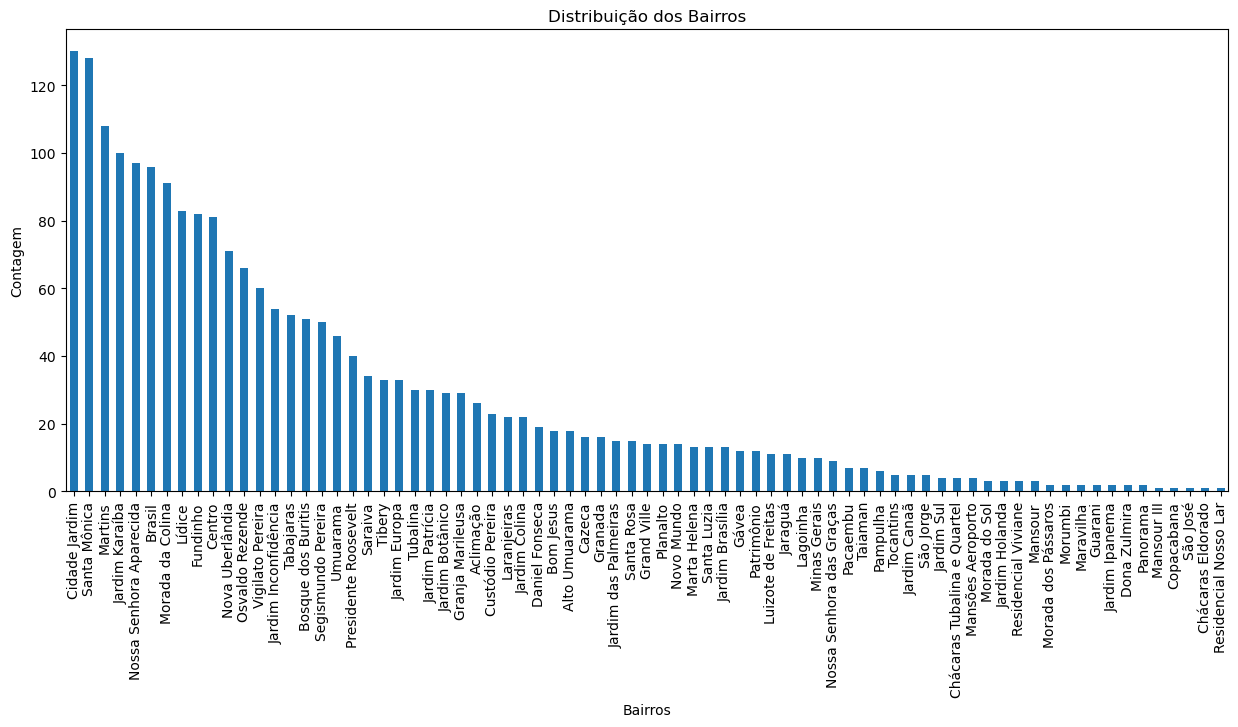

In [20]:
plt.figure(figsize=(15, 6))
neighborhood_count.plot(kind='bar')
plt.title('Distribuição dos Bairros')
plt.xlabel('Bairros')
plt.ylabel('Contagem')
plt.show()

In [21]:
total_observations = len(df)
limit_percentage = 0.01  # 1% do total

threshold = total_observations * limit_percentage

# Verifica quantos bairros estão abaixo do limiar
neighborhoods_below_threshold = neighborhood_count[neighborhood_count < threshold]

print(f'Número de bairros abaixo do limiar de {threshold} observações: {len(neighborhoods_below_threshold)}')
print(f'Bairros abaixo do limiar: {neighborhoods_below_threshold.index.tolist()}')


Número de bairros abaixo do limiar de 21.48 observações: 45
Bairros abaixo do limiar: ['Daniel Fonseca', 'Bom Jesus', 'Alto Umuarama', 'Cazeca', 'Granada', 'Jardim das Palmeiras', 'Santa Rosa', 'Grand Ville', 'Planalto', 'Novo Mundo', 'Marta Helena', 'Santa Luzia', 'Jardim Brasília', 'Gávea', 'Patrimônio', 'Luizote de Freitas', 'Jaraguá', 'Lagoinha', 'Minas Gerais', 'Nossa Senhora das Graças', 'Pacaembu', 'Taiaman', 'Pampulha', 'Tocantins', 'Jardim Canaã', 'São Jorge', 'Jardim Sul', 'Chácaras Tubalina e Quartel', 'Mansões Aeroporto', 'Morada do Sol', 'Jardim Holanda', 'Residencial Viviane', 'Mansour', 'Morada dos Pássaros', 'Morumbi', 'Maravilha', 'Guarani', 'Jardim Ipanema', 'Dona Zulmira', 'Panorama', 'Mansour III', 'Copacabana', 'São José', 'Chácaras Eldorado', 'Residencial Nosso Lar']


Se percebe que alguns bairros têm uma ocorrência muito baixa na base de dados, o que pode afetar a generalização do modelo de ML.
Então, uma das formas de lidar com isso é selecionar os bairros de baixa ocorrência e criar uma categoria 'outros' para que assim eles não afetem significativamente o desempenho do modelo. 

In [22]:
rare_neighborhoods = neighborhood_count[neighborhood_count < threshold].index

# Substituindo os bairros raros pela categoria 'Outros'
df['Neighborhood'] = df['Neighborhood'].apply(lambda x: 'Outros' if x in rare_neighborhoods else x)
df.head()

,Rent_price,Bedrooms,Square_meters,Garage,Bathrooms,City,Neighborhood,Square_meters_std
0,1700.0,3,250.0,3,2,Uberlândia,Outros,0.283786
1,1600.0,3,150.0,0,2,Uberlândia,Outros,-0.488136
2,2000.0,2,120.0,1,3,Uberlândia,Jardim Inconfidência,-0.719713
3,4200.0,4,240.0,2,4,Uberlândia,Segismundo Pereira,0.206593
4,4000.0,3,200.0,5,4,Uberlândia,Santa Mônica,-0.102175


In [23]:
# One-hot encoding na coluna 'Neighborhood'
dummies = pd.get_dummies(df.Neighborhood, dtype=int)
df = pd.concat([df,dummies], axis='columns')

In [24]:
# Removendo colunas que não vão mais ser utilizadas
df.drop(['Square_meters','Neighborhood','City'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape


(2148, 36)

# 2. Separando Dados

In [25]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    df.drop(['Rent_price'], axis=1),
    df['Rent_price'],
    test_size = 0.25,
    random_state = 123  
)

In [26]:
predictors_train.head()

,Bedrooms,Garage,Bathrooms,Square_meters_std,Aclimação,Bosque dos Buritis,Brasil,Centro,Cidade Jardim,Custódio Pereira,...,Outros,Presidente Roosevelt,Santa Mônica,Saraiva,Segismundo Pereira,Tabajaras,Tibery,Tubalina,Umuarama,Vigilato Pereira
1788,3,4,5,1.827630,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1672,3,2,3,-0.681117,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1866,2,1,2,-1.105674,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
522,2,0,1,-1.105674,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1341,3,0,3,-1.020763,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
predictors_train.shape

(1611, 35)

In [28]:
predictors_test.head()

,Bedrooms,Garage,Bathrooms,Square_meters_std,Aclimação,Bosque dos Buritis,Brasil,Centro,Cidade Jardim,Custódio Pereira,...,Outros,Presidente Roosevelt,Santa Mônica,Saraiva,Segismundo Pereira,Tabajaras,Tibery,Tubalina,Umuarama,Vigilato Pereira
1232,3,3,4,-0.565329,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
777,3,3,4,0.206593,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1739,4,3,2,-0.017264,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1039,3,2,3,0.283786,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1426,1,1,3,0.283786,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
predictors_test.shape

(537, 35)

In [30]:
target_train.head()

1788    10000.0
1672     3800.0
1866     1400.0
522      1000.0
1341     3500.0
Name: Rent_price, dtype: float64

In [31]:
target_train.shape

(1611,)

In [32]:
target_test.head()

1232     5400.0
777     13000.0
1739     3000.0
1039     3000.0
1426     4500.0
Name: Rent_price, dtype: float64

In [33]:
target_test.shape

(537,)

# 3. Treinamento de Modelo

In [34]:
model = LinearRegression()

In [35]:
model = model.fit(predictors_train, target_train)

In [36]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Bedrooms', 'Garage', 'Bathrooms', 'Square_meters_std',
        'Aclimação', 'Bosque dos Buritis', 'Brasil', 'Centro',
        'Cidade Jardim', 'Custódio Pereira', 'Fundinho',
        'Granja Marileusa', 'Jardim Botânico', 'Jardim Colina',
        'Jardim Europa', 'Jardim Inconfidência', 'Jardim Karaíba',
        'Jardim Patrícia', 'Laranjeiras', 'Lídice', 'Martins',
        'Morada da Colina', 'Nossa Senhora Aparecida', 'Nova Uberlândia',
        'Osvaldo Rezende', 'Outros', 'Presidente Roosevelt',
        'Santa Mônica', 'Saraiva', 'Segismundo Pereira', 'Tabajaras',
        'Tibery', 'Tubalina', 'Umuarama', 'Vigilato Pereira'], dtype=object),
 'n_features_in_': 35,
 'coef_': array([ 1.21698578e+02,  1.04085250e+02,  5.54236969e+02,  1.40971315e+03,
        -4.84806511e+14, -4.84806511e+14, -4.84806511e+14, -4.84806511e+14,
        -4.84806511e+14, -4.84806511e+14, -4.84806511e+1

# 4. Avaliação

In [37]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [38]:
target_predicted = model.predict(predictors_test)

In [39]:
target_predicted[0:5]

array([ 6433.5625, 10316.375 ,  4267.6875,  4620.5625,  3938.5   ])

In [40]:
target_predicted.shape

(537,)

In [41]:
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

2265.6948336553405


In [42]:
test_data = pd.concat([predictors_test, pd.DataFrame(target_test, columns=['Rent_price'])], axis=1).reset_index(drop=True)
test_data['predicted'] = False

In [43]:
test_data.head()

,Bedrooms,Garage,Bathrooms,Square_meters_std,Aclimação,Bosque dos Buritis,Brasil,Centro,Cidade Jardim,Custódio Pereira,...,Santa Mônica,Saraiva,Segismundo Pereira,Tabajaras,Tibery,Tubalina,Umuarama,Vigilato Pereira,Rent_price,predicted
0,3,3,4,-0.565329,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5400.0,False
1,3,3,4,0.206593,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,13000.0,False
2,4,3,2,-0.017264,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3000.0,False
3,3,2,3,0.283786,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,3000.0,False
4,1,1,3,0.283786,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,4500.0,False


In [44]:
prediction_data = pd.concat([predictors_test.reset_index(drop=True), pd.DataFrame(target_predicted, columns=['Rent_price'])], axis=1).reset_index(drop=True)
prediction_data['predicted'] = True

In [45]:
prediction_data.head()

,Bedrooms,Garage,Bathrooms,Square_meters_std,Aclimação,Bosque dos Buritis,Brasil,Centro,Cidade Jardim,Custódio Pereira,...,Santa Mônica,Saraiva,Segismundo Pereira,Tabajaras,Tibery,Tubalina,Umuarama,Vigilato Pereira,Rent_price,predicted
0,3,3,4,-0.565329,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6433.5625,True
1,3,3,4,0.206593,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10316.3750,True
2,4,3,2,-0.017264,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4267.6875,True
3,3,2,3,0.283786,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,4620.5625,True
4,1,1,3,0.283786,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,3938.5000,True


In [46]:
prediction = pd.concat([test_data, prediction_data]).reset_index(drop=True)

In [47]:
# Ordenar o DataFrame pela coluna Square_meters_std do maior para o menor
df_sorted = prediction.sort_values(by='Square_meters_std', ascending=False)

# Mostrar os primeiros 10 valores para inspecionar os maiores valores padronizados
print(df_sorted[['Square_meters_std']].head(10))

# Mostrar os últimos 10 valores para inspecionar os menores valores padronizados
print(df_sorted[['Square_meters_std']].tail(10))


     Square_meters_std
324           9.932811
861           9.932811
921           3.749715
384           3.749715
546           3.734277
9             3.734277
829           3.603050
292           3.603050
823           3.139897
286           3.139897
     Square_meters_std
974          -1.568827
425          -1.568827
150          -1.568827
622          -1.568827
985          -1.568827
962          -1.568827
913          -1.568827
915          -1.568827
85           -1.568827
361          -1.568827


In [48]:
import seaborn as sns

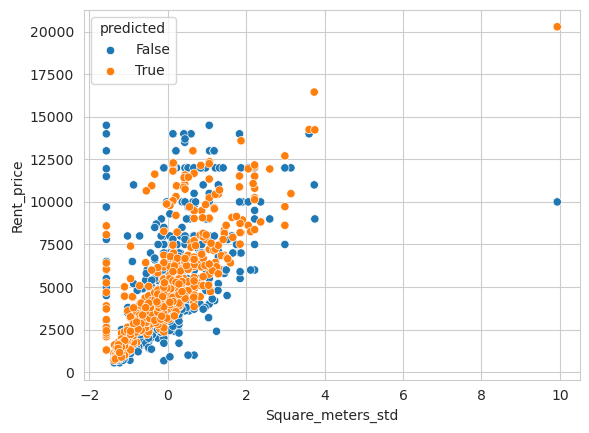

In [49]:
with sns.axes_style('whitegrid'):

  
  sns.scatterplot(data=prediction,x='Square_meters_std', y='Rent_price', hue='predicted')

Bedrooms	Garage	Bathrooms	Square_meters_std	Aclimação	Bosque dos Buritis	Brasil	Centro	Cidade Jardim	Fundinho	...	Outros	Presidente Roosevelt	Santa Mônica	Saraiva	Segismundo Pereira	Tabajaras	Tibery	Tubalina	Umuarama	Vigilato Pereira

In [50]:
Bedrooms = int(input('Quantidade de quartos da casa: '))
Garage = int(input('Vagas de garagem: '))
Bathrooms = int(input('Quantidade de banheiros da casa: '))
Square_meters = float(input('M² da casa: '))
Square_meters_std = (Square_meters - Square_meters_mean) / Square_meters_std

Quantidade de quartos da casa:  5
Vagas de garagem:  3
Quantidade de banheiros da casa:  5
M² da casa:  300


In [51]:
print(f'{Square_meters_mean} -- {Square_meters_std}')

213.2364990689013 -- 0.6697465500850345


In [54]:
house_array = np.array([Bedrooms, Garage, Bathrooms, Square_meters_std,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
print(house_array)

[5.         3.         5.         0.66974655 1.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


In [55]:
rent_price = model.predict(house_array.reshape(1, -1))
print(rent_price)

[9169.125]


C:\ProgramData\miniconda3\envs\pydata-book\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
